# Big Data y Machine Learning (UBA) -  2025

## Trabajo Práctico 1: Jugando con APIs y WebScraping 

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Viernes 4 de Abril a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo 25RO35480961@campus.economicas.uba.ar. Usar de asunto de email <i>"Big Data - TP 1 - Grupo #"</i> y nombrar el archivo <i>"TP1_Grupo #"</i> donde # es el número de grupo que le fue asignado.
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. 
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.
- En resumen, la carpeta del repositorio debe incluir:
    - El codigo
    - Un documento Word (Parte A) donde esten las figuras y una breve descripción de las mismas.
    - El excel con los links webscrappeados (Parte B)

### Parte A

#### Ejercicio 1 - Jugando con APIs
Usando la API del Banco Mundial [link](https://wbdata.readthedocs.io/en/stable/) , obtener dos series de indicadores para dos paises a elección en una consulta de búsqueda. Pueden buscar serie de indicadores de su interés.

In [2]:
# Resolver acá
"""
los datos a analizar son el PBI en dólares de Argentina y el de Estados unidos
todos los datos fueron sacados de la base de datos del BM con sus respectivas APIs
también se buscó un analisis de los años 2014 a 2023
"""
import requests
import pandas as pd
url = "https://api.worldbank.org/v2/country/AR/indicator/NY.GDP.MKTP.CD?format=json"
response = requests.get(url)
if response.status_code == 200:
    data_1 = response.json()
    print(data_1)
else: print("Error al obtener los datos:", response.status_code)
df_AR = pd.DataFrame.from_records([
    {"años": int(item["date"]), "Pbi(U$)_Argentina": item["value"]}
    for item in data_1[1] if int(item["date"]) >= 2014 and int(item["date"]) <= 2024
])
print(df_AR)

[{'page': 1, 'pages': 2, 'per_page': 50, 'total': 64, 'sourceid': '2', 'lastupdated': '2025-03-24'}, [{'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'}, 'country': {'id': 'AR', 'value': 'Argentina'}, 'countryiso3code': 'ARG', 'date': '2023', 'value': 646075277525.125, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'}, 'country': {'id': 'AR', 'value': 'Argentina'}, 'countryiso3code': 'ARG', 'date': '2022', 'value': 632790070063.124, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'}, 'country': {'id': 'AR', 'value': 'Argentina'}, 'countryiso3code': 'ARG', 'date': '2021', 'value': 486564085480.036, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'}, 'country': {'id': 'AR', 'value': 'Argentina'}, 'countryiso3code': 'ARG', 'date': '2020', 'value': 385740508436.965, 'unit': '', 'obs_st

In [4]:
url = "https://api.worldbank.org/v2/country/USA/indicator/NY.GDP.MKTP.CD?format=json"
response = requests.get(url)
if response.status_code == 200:
    data_2 = response.json()
    print(data_2)
else: print("Error al obtener los datos:", response.status_code)
df_EEUU = pd.DataFrame.from_records([
    {"años": int(item["date"]), "Pbi(U$)_EEUU": item["value"]}
    for item in data_2[1] if int(item["date"]) >= 2014 and int(item["date"]) <= 2024
])
print(df_EEUU)

[{'page': 1, 'pages': 2, 'per_page': 50, 'total': 64, 'sourceid': '2', 'lastupdated': '2025-03-24'}, [{'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'}, 'country': {'id': 'US', 'value': 'United States'}, 'countryiso3code': 'USA', 'date': '2023', 'value': 27720709000000, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'}, 'country': {'id': 'US', 'value': 'United States'}, 'countryiso3code': 'USA', 'date': '2022', 'value': 26006893000000, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'}, 'country': {'id': 'US', 'value': 'United States'}, 'countryiso3code': 'USA', 'date': '2021', 'value': 23681171000000, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'}, 'country': {'id': 'US', 'value': 'United States'}, 'countryiso3code': 'USA', 'date': '2020', 'value': 21354105000000, 'unit': '',

In [6]:
"""
Para mejorar visualización y realizar una comparación entre indicadores
primero se importó pandas
después se trató de igualar la cantidad de datos en ambas series
finalmente se armó un dataframe con una comparación
"""
import pandas as pd
min_length = min(len(df_AR), len(df_EEUU))
df_AR = df_AR.iloc[:min_length] 
df_EEUU = df_EEUU.iloc[:min_length]

#DataFrame con igualación de años
df_comparacion = pd.DataFrame({
    "Años": df_AR["años"].values,  
    "Argentina (USD)": [f"${valor:,.2f}" for valor in df_AR["Pbi(U$)_Argentina"]],  
    "EE.UU. (USD)": [f"${valor:,.2f}" for valor in df_EEUU["Pbi(U$)_EEUU"]]
})
print(df_comparacion)

   Años      Argentina (USD)            EE.UU. (USD)
0  2023  $646,075,277,525.12  $27,720,709,000,000.00
1  2022  $632,790,070,063.12  $26,006,893,000,000.00
2  2021  $486,564,085,480.04  $23,681,171,000,000.00
3  2020  $385,740,508,436.97  $21,354,105,000,000.00
4  2019  $447,754,683,615.22  $21,539,982,000,000.00
5  2018  $524,819,892,360.18  $20,656,516,000,000.00
6  2017  $643,628,393,281.36  $19,612,102,000,000.00
7  2016  $557,532,320,662.95  $18,804,913,000,000.00
8  2015  $594,749,285,413.21  $18,295,019,000,000.00
9  2014  $526,319,673,731.64  $17,608,138,000,000.00


#### Ejercicio 2 - Repaso de Pandas
Realicen una estadistica descriptiva de ambas series de indicadores comparando los dos países.

In [8]:
#resolver acá
"""
Para realizar una estadística comparativa, decidimos analizar:
Media, mediana, desvío (en caso de errores u omisiones), puntos máximos y mínimos
Al igual que el punto anterior, los datos fueron pasados a variables con magnitud en dólares y se las redondeó
"""
media_AR = df_AR["Pbi(U$)_Argentina"].mean()
mediana_AR = df_AR["Pbi(U$)_Argentina"].median()
desvio_AR = df_AR["Pbi(U$)_Argentina"].std()
minimo_AR = df_AR["Pbi(U$)_Argentina"].min()
maximo_AR = df_AR["Pbi(U$)_Argentina"].max()
media_EEUU = df_EEUU["Pbi(U$)_EEUU"].mean()
mediana_EEUU = df_EEUU["Pbi(U$)_EEUU"].median()
desvio_EEUU = df_EEUU["Pbi(U$)_EEUU"].std()
minimo_EEUU = df_EEUU["Pbi(U$)_EEUU"].min()
maximo_EEUU = df_EEUU["Pbi(U$)_EEUU"].max()
df_comparacion = pd.DataFrame({
    "Estadística": ["Media", "Mediana", "Desviación Estándar","Mínimo", "Máximo"],
    "Argentina (USD)": [f"${media_AR:,.2f}", f"${mediana_AR:,.2f}", f"${desvio_AR:,.2f}",f"${minimo_AR:,.2f}", f"${maximo_AR:,.2f}"],
    "EE.UU. (USD)": [f"${media_EEUU:,.2f}", f"${mediana_EEUU:,.2f}", f"${desvio_EEUU:,.2f}",f"${minimo_EEUU:,.2f}", f"${maximo_EEUU:,.2f}"]
})
print(df_comparacion)


           Estadística      Argentina (USD)            EE.UU. (USD)
0                Media  $544,597,419,056.98  $21,527,954,800,000.00
1              Mediana  $541,925,997,197.30  $21,005,310,500,000.00
2  Desviación Estándar   $87,732,220,412.92   $3,345,635,501,862.81
3               Mínimo  $385,740,508,436.97  $17,608,138,000,000.00
4               Máximo  $646,075,277,525.12  $27,720,709,000,000.00


#### Ejercicio 3 - Practicando con Matplotlib
Armen dos gráficos distintos usando la librería Matplotlib (repasen Clase 4). Uno programandolo con el estilo *pyplot* y otro gráfico de estilo *orientada a objetos*

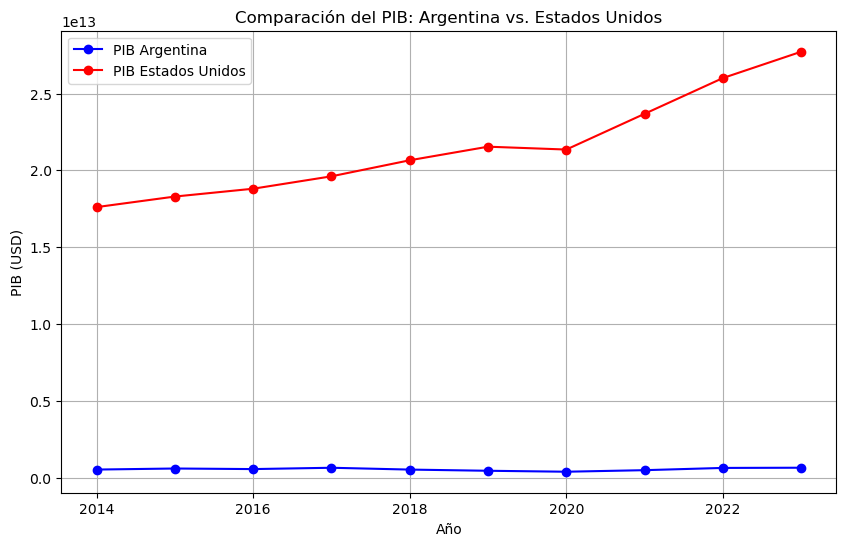

In [28]:
# Resolver acá estilo pyplot
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df_AR["años"], df_AR["Pbi(U$)_Argentina"], marker='o', linestyle='-', color='b', label="PIB Argentina")
plt.plot(df_EEUU["años"], df_EEUU["Pbi(U$)_EEUU"], marker='o', linestyle='-', color='r', label="PIB Estados Unidos")
plt.xlabel("Año")
plt.ylabel("PIB (USD)")
plt.title("Comparación del PIB: Argentina vs. Estados Unidos")
plt.legend()  # Muestra la leyenda
plt.grid(True)
plt.savefig("Figura1.png")


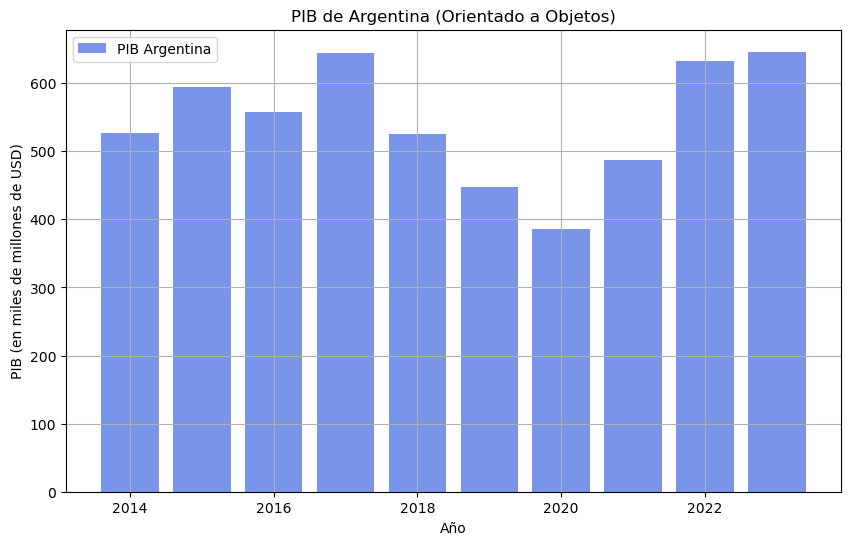

In [30]:
# Resolver acá estilo orientado-objetos 
# Tip: aprovechar este estilo de programar una figura para hacerlo más lindo 
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df_AR["años"], df_AR["Pbi(U$)_Argentina"] / 1e9, color='royalblue', alpha=0.7, label="PIB Argentina")
ax.set_xlabel("Año")
ax.set_ylabel("PIB (en miles de millones de USD)")
ax.set_title("PIB de Argentina (Orientado a Objetos)")
ax.legend()
ax.grid(True)
fig.savefig("Figura2.png")

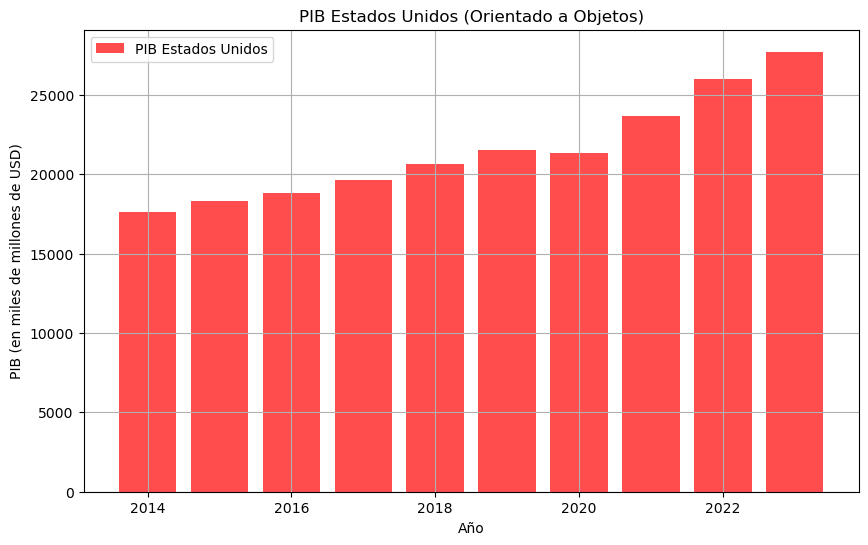

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df_EEUU["años"], df_EEUU["Pbi(U$)_EEUU"] /1e9, color='red', alpha=0.7, label="PIB Estados Unidos")
ax.set_xlabel("Año")
ax.set_ylabel("PIB (en miles de millones de USD)")
ax.set_title("PIB Estados Unidos (Orientado a Objetos)")
ax.legend()
ax.grid(True)
fig.savefig("Figura3.png")

# Fuentes del banco mundial
## PIB (US$ a precios actuales) - Argentina, United States
https://datos.bancomundial.org/indicador/NY.GDP.MKTP.CD?locations=AR-US

### Parte B

#### Ejercicio 4
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/) o cualquier diario que les interese, utilicen herramientas de web scraping para obtener los **links** de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [64]:
# Resolver acá
import requests
from bs4 import BeautifulSoup
import pandas as pd

#URL del diario La nacion
url = "https://www.lanacion.com.ar/"

#solicitud HTTP
r = requests.get(url)
contenido = r.content
soup = BeautifulSoup(contenido, "html.parser")
soup



<!DOCTYPE html>
<html lang="es"><head><meta charset="utf-8"/><meta content="width=device-width,initial-scale=1.0,minimum-scale=0.5,maximum-scale=5.0,user-scalable=yes" name="viewport"/><meta content="#ffffff" name="theme-color"/><title>Últimas noticias de Argentina y el mundo - LA NACION</title><link as="image" fetchpriority="high" href="https://www.lanacion.com.ar/resizer/v2/donald-trump-muestra-un-grafico-con-las-nuevas-VUZZMUZPFRCGTNPOIOV7VJLHMI.JPG?auth=d0c692aaa84af719baaf9d44a8b5af34dbe072644730deb32e23f2e467a6f1be&amp;width=488&amp;height=325&amp;quality=70&amp;smart=true" media="(min-width: 768px)" rel="preload"/><link as="image" fetchpriority="high" href="https://www.lanacion.com.ar/resizer/v2/donald-trump-muestra-un-grafico-con-las-nuevas-VUZZMUZPFRCGTNPOIOV7VJLHMI.JPG?auth=d0c692aaa84af719baaf9d44a8b5af34dbe072644730deb32e23f2e467a6f1be&amp;width=420&amp;height=280&amp;quality=70&amp;smart=true" media="(max-width: 767px)" rel="preload"/><link as="image" fetchpriority="high" 

In [66]:
#de esta manera dentro de la sopa, traemos todos los titulos atraves del elemento find_all
h2_elements = soup.find_all('h2')
print('\n', h2_elements)


 [<h2 class="text ln-text subhead --font-s">El presidente lo calificó como una “declaración de independencia económica” y prometió una “edad de oro”; confirmó los aranceles de 25% a los autos; cómo se ve afectado nuestro país según la tabla que exhibió en la Casa Blanca</h2>, <h2 class="text ln-text title --prumo --font-medium --font-m-l"><span class="text ln-text lead --prumo --font-extra">Amenaza al orden global.<!-- --> </span>¿“Día de la liberación” o “día de la destrucción”?: Trump abre una nueva era plagada de incógnitas</h2>, <h2 class="text ln-text title --prumo --font-medium --font-m-l"><span class="text ln-text lead --prumo --font-extra">"Friends will be friends".<!-- --> </span>Milei celebró el trato que Trump le dio a la Argentina con los aranceles</h2>, <h2 class="text ln-text title --prumo --font-medium --font-m-l"><span class="text ln-text lead --prumo --font-extra">"Preocupaciones infundadas".<!-- --> </span>El anuncio sobre los aranceles: qué dice el documento de la C

In [68]:
#limpiamos
for i in h2_elements: 
    h2_text = i.text.strip()
    print(h2_text)

El presidente lo calificó como una “declaración de independencia económica” y prometió una “edad de oro”; confirmó los aranceles de 25% a los autos; cómo se ve afectado nuestro país según la tabla que exhibió en la Casa Blanca
Amenaza al orden global. ¿“Día de la liberación” o “día de la destrucción”?: Trump abre una nueva era plagada de incógnitas
"Friends will be friends". Milei celebró el trato que Trump le dio a la Argentina con los aranceles
"Preocupaciones infundadas". El anuncio sobre los aranceles: qué dice el documento de la Casa Blanca sobre la Argentina
Impacto en la Argentina. El “Día de la liberación” de Trump le hace olas al plan de Milei
Estreno en la Copa. River gana en Perú por la Libertadores: Paulo Díaz abrió el marcador
Malvinas. El regreso de la política de “seducción” a los isleños que dispuso Milei genera polémica y rechazos
"Situación de potencial colapso". Costará 35 mil millones de pesos recuperar el Centro Cultural San Martín
"Necesito hacer plata". Los chats

In [79]:
#creamos una lista y gurdamos los titulos
titulos = []
for i in h2_elements:
    h2_text = i.text.strip()
     
    titulos.append({
        'titular': h2_text
    })
#creamos un dataframe
titulos_df = pd.DataFrame(titulos)

In [81]:
titulos_df

,titular
0,El presidente lo calificó como una “declaració...
1,Amenaza al orden global. ¿“Día de la liberació...
2,"""Friends will be friends"". Milei celebró el tr..."
3,"""Preocupaciones infundadas"". El anuncio sobre ..."
4,Impacto en la Argentina. El “Día de la liberac...
...,...
126,Antes y después. La reforma de este PH en Balv...
127,En detalle. El calendario de feriados de abri...
128,Quini 6. Cuál es el pozo del sorteo este miérc...
129,Abril 2025. Promociones y ofertas de Cuenta DN...


In [87]:
#exportmaos el DataFrame a un archivo de excel
archivo_excel = "titulos.xlsx"

titulos_df.to_excel(archivo_excel, index=False)

In [89]:
#leemos el archivo excel y mostramos
df_leido = pd.read_excel(archivo_excel)
print(df_leido)

                                               titular
0    El presidente lo calificó como una “declaració...
1    Amenaza al orden global. ¿“Día de la liberació...
2    "Friends will be friends". Milei celebró el tr...
3    "Preocupaciones infundadas". El anuncio sobre ...
4    Impacto en la Argentina. El “Día de la liberac...
..                                                 ...
126  Antes y después. La reforma de este PH en Balv...
127  En detalle.  El calendario de feriados de abri...
128  Quini 6. Cuál es el pozo del sorteo este miérc...
129  Abril 2025. Promociones y ofertas de Cuenta DN...
130  Multitudinaria. Así quedó la placa de nominado...

[131 rows x 1 columns]
